== 事前準備： ライブラリのインポートとデータの読み込み

In [9]:
import os
import numpy as np
import pandas as pd

pd.set_option('future.no_silent_downcasting', True)
# print all downloaded files to check if they are there
excel_dir = "../../../src/downloads/"
# place to save output csv files
output_dir = "../../../data/研究費/"
os.makedirs(output_dir, exist_ok=True)

print(os.listdir(excel_dir))

['第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2017_1747118972.xls', '第7表 産業別、企業数、事業所数、従業者数、部門別売上高、営業費用、営業利益、直接輸出額、直接輸入額、総資産額、子会社・関連会社の保有社数_2004_1747119356.xls', '第12表 産業別、企業数、技術取引の受取金額_2013_1747119068.xls', '第7表 産業別、親会社業種別、議決権所有割合別、国内・海外別社数_2022_1747118875.xls', '第1表 産業別、企業数、事業所数、従業者数、資産、負債及び純資産、売上高、売上総利益、営業費用、営業利益、経常利益、当期純利益、付加価値額、子会社・関連会社数_2019_1747118927.xls', '第2表 産業別、従業者規模別、資本金規模別、企業数、総資産、売上高、付加価値額_2011_1747119120.xls', '2 産業別、売上高経常利益率別売上高_2009_1747119208.xls', '4 産業別、損益計算書の消費税扱い、決算期別企業数_2017_1747118976.xls', '第6表 産業別、企業数、事業所数、従業者数、部門別売上高、営業費用、営業利益、直接輸出額、直接輸入額、総資産、子会社・関連会社の保有社数_2006_1747119282.xls', '第3表 産業別、事業活動別、企業数、売上高_2017_1747118977.xls', '2 産業別、売上高経常利益率別売上高_2005_1747119308.xls', '第7表 産業別、親会社業種別、議決権所有割合別、国内・海外別社数_2011_1747119153.xls', '第11表 産業別、製造委託以外の委託分野別、国内・海外別企業数及び業務委託金額_2021_1747118893.xls', '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2016_1747118989.xls', '10 産業別、企業数、取締役の人数、委員会設置会社の状況、ストックオプション制度の実施状況_2013_1747119076.xls', '第8表 産業別、親会社業種別、親会社の経営形態別、連結対象関係別の企業

今回、「産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費」で始まるファイルだけをクリーンアップする。

In [10]:
filepaths = [fp for fp in os.listdir(excel_dir) if "研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費" in fp]
filepaths

['第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2017_1747118972.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2016_1747118989.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2015_1747119016.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2021_1747118881.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2012_1747119101.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2023_1747118840.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2013_1747119067.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2010_1747119165.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2022_1747118861.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2019_1747118932.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2018_1747118952.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2014_1747119037.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2011_1747119126.xls',
 '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_

フォマットが揃っていないので、細かいところ年ごとに対応の必要がある

年分は各ファイルの"_"で挟んだ部分

In [11]:
year_to_filepath = {}
for filepath in filepaths:
    # 年分を取得
    year = int(filepath.split("_")[1])
    # 年分：pathの辞書を作成
    year_to_filepath[year] = filepath
    print(year)
print(year_to_filepath)

2017
2016
2015
2021
2012
2023
2013
2010
2022
2019
2018
2014
2011
2020
{2017: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2017_1747118972.xls', 2016: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2016_1747118989.xls', 2015: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2015_1747119016.xls', 2021: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2021_1747118881.xls', 2012: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2012_1747119101.xls', 2023: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2023_1747118840.xls', 2013: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2013_1747119067.xls', 2010: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2010_1747119165.xls', 2022: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2022_1747118861.xls', 2019: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2019_1747118932.xls', 2018: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2018_1747118952.xls', 2014: '第10表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費_2014_1747119037

## Try with one table first
== エクセルからpandas dfの関数を作りたい、まず2010のデータで試す

In [12]:
# pathを取得
filepath = year_to_filepath[2010]
df = pd.read_excel(os.path.join(excel_dir, filepath), header=1)
df

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,第１巻 〔研究開発に関する表〕,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,第１０表 産業別、企業数、売上高、研究開発費及び売上高比率、受託研究費、研究開発投資、能力開発費,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,企業数,研究開発,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,研究開発投資,NaN,能力開発,NaN
3,NaN,NaN,NaN,売上高\n（百万円）,研究開発費,NaN,NaN,NaN,NaN,売上高\n研究開発費\n比率（％）,受託研究費\n（百万円）,NaN,NaN,企業数,当期取得額\n（百万円）,企業数,能力開発費\n（百万円）
4,NaN,NaN,NaN,NaN,計,自社研究\n開発費\n（百万円）,委託研究\n開発費\n（百万円）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,NaN,927 ディスプレイ業,7,39378,81,81,-,-,-,0.21,-,-,-,-,-,2,X
167,NaN,928 テレマーケティング業,-,-,-,-,-,-,-,-,-,-,-,-,-,10,102
168,NaN,929 その他の事業サービス業,26,X,X,2098,X,230,-,X,-,-,-,6,31,99,1148
169,NaN,サービス業（その他のサービス業）,34,890312,10670,10200,470,243,-,1.2,121,74,-,5,3307,120,1857


== 第0列と第0~3行はいらないと分かったので、消します (表の名前だけなので)

In [13]:
# Remove the 0th column
df = df.drop(columns=df.columns[0])
# Remove rows 0 to 3
df = df.iloc[2:].reset_index(drop=True)
df

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,企業数,研究開発,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,研究開発投資,NaN,能力開発,NaN
1,NaN,NaN,売上高\n（百万円）,研究開発費,NaN,NaN,NaN,NaN,売上高\n研究開発費\n比率（％）,受託研究費\n（百万円）,NaN,NaN,企業数,当期取得額\n（百万円）,企業数,能力開発費\n（百万円）
2,NaN,NaN,NaN,計,自社研究\n開発費\n（百万円）,委託研究\n開発費\n（百万円）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,うち、関係会社への\n委託,NaN,NaN,NaN,うち、関係会社からの\n受託,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,国内\n（百万円）,海外\n（百万円）,NaN,NaN,国内\n（百万円）,海外\n（百万円）,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
164,927 ディスプレイ業,7,39378,81,81,-,-,-,0.21,-,-,-,-,-,2,X
165,928 テレマーケティング業,-,-,-,-,-,-,-,-,-,-,-,-,-,10,102
166,929 その他の事業サービス業,26,X,X,2098,X,230,-,X,-,-,-,6,31,99,1148
167,サービス業（その他のサービス業）,34,890312,10670,10200,470,243,-,1.2,121,74,-,5,3307,120,1857


== 元のExcelファイルには結合されたセルがあるため、それらの結合セルの要素を右側にコピーすることで対応します。

In [14]:
# Remove all whitespaces from the dataframe
df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
df2 = df.copy()
# 結合されたセルとコピーが必要な回数
merged_headers = {
    "研究開発": 10,
    "研究開発投資": 1,
    "能力開発": 1,
    "研究開発費": 4,
    "委託研究開発費（百万円）": 2,
    "受託研究費（百万円）": 2,
    "うち、関係会社への委託": 1,
    "うち、関係会社からの受託": 1
}
# Handle merged cells based on merged_headers
for key, value in merged_headers.items():
    # 5行目まではヘッダー行
    for row in range(5):
        if key in df2.iloc[row].values:
            # 結合された行を取得
            col_index = df2.iloc[row].tolist().index(key)
            for i in range(value):
                # 結合されたセルの右側の列に値をコピー
                # 右側の列が空であれば値をコピー
                if pd.isna(df2.iloc[row, col_index + i + 1]):
                    df2.iloc[row, col_index + i + 1] = key
            break
            
df2.head()

,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16
0,NaN,企業数,研究開発,研究開発,研究開発,研究開発,研究開発,研究開発,研究開発,研究開発,研究開発,研究開発,研究開発投資,研究開発投資,能力開発,能力開発
1,NaN,NaN,売上高（百万円）,研究開発費,研究開発費,研究開発費,研究開発費,研究開発費,売上高研究開発費比率（％）,受託研究費（百万円）,受託研究費（百万円）,受託研究費（百万円）,企業数,当期取得額（百万円）,企業数,能力開発費（百万円）
2,NaN,NaN,NaN,計,自社研究開発費（百万円）,委託研究開発費（百万円）,委託研究開発費（百万円）,委託研究開発費（百万円）,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,うち、関係会社への委託,うち、関係会社への委託,NaN,NaN,うち、関係会社からの受託,うち、関係会社からの受託,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,国内（百万円）,海外（百万円）,NaN,NaN,国内（百万円）,海外（百万円）,NaN,NaN,NaN,NaN


== 最初の5行を結合してヘッダーを作成します。最初の列に欠けていた「産業」を追加しました。

In [15]:
df2.iloc[0,0] = "産業"
# Process the first five rows to create a single header row
header_rows = df2.iloc[:5].fillna('').astype(str)
header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)

# Update the dataframe with the new header
df2.columns = header
df2 = df2.iloc[5:].reset_index(drop=True)

df2.head()

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）
0,平成17年度,8120,348447199,11270653,9669140,1601513,-,-,3.23,363736,-,-,2340,830337,-,-
1,平成18年度,7755,381433333,12511047,10564866,1946181,-,-,3.28,431795,-,-,2465,885842,-,-
2,平成19年度,7809,388068055,12527980,10730376,1797604,-,-,3.23,403713,-,-,2293,822587,-,-
3,平成20年度,7830,361433981,12886297,11039871,1846426,-,-,3.57,543439,-,-,2349,1292531,-,-
4,平成21年度,8068,299536235,10438431,8893697,1544734,669247,77407,3.48,418136,125969,9636,1771,476616,7645,376301


== 過去の年度のデータである最初の5行を削除します。これらの年度については、後でより情報量の多い表を作成します。

In [16]:
df2 = df2.iloc[5:].reset_index(drop=True)
df2.head()

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）
0,総合計,8068,299536235,10438431,8893697,1544734,669247,77407,3.48,418136,125969,9636,1771,476616,7645,376301
1,合計,7909,290389660,10391978,8864962,1527016,668768,77400,3.58,417167,125708,9636,1750,473123,7306,371345
2,鉱業、採石業、砂利採取業,7,X,X,X,X,470,-,X,-,-,-,1,X,9,X
3,製造業,6101,209652609,9548493,8205540,1342953,648434,72595,4.55,257652,45464,1159,1518,438009,3489,289566
4,090食料品製造業,676,12609629,147598,134512,13086,1670,1965,1.17,1553,505,-,113,10035,354,4236


== すべての「X」と「-」をNaNに置き換えます。

== これで2010のクリーニング、完成

In [17]:
df2.replace({'X': np.nan, '-': np.nan}, inplace=True)
df2

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）
0,総合計,8068,299536235,10438431,8893697,1544734,669247,77407,3.48,418136,125969,9636,1771,476616,7645,376301
1,合計,7909,290389660,10391978,8864962,1527016,668768,77400,3.58,417167,125708,9636,1750,473123,7306,371345
2,鉱業、採石業、砂利採取業,7,NaN,NaN,NaN,NaN,470,NaN,NaN,NaN,NaN,NaN,1,NaN,9,NaN
3,製造業,6101,209652609,9548493,8205540,1342953,648434,72595,4.55,257652,45464,1159,1518,438009,3489,289566
4,090食料品製造業,676,12609629,147598,134512,13086,1670,1965,1.17,1553,505,NaN,113,10035,354,4236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,927ディスプレイ業,7,39378,81,81,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,2,NaN
155,928テレマーケティング業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,102
156,929その他の事業サービス業,26,NaN,NaN,2098,NaN,230,NaN,NaN,NaN,NaN,NaN,6,31,99,1148
157,サービス業（その他のサービス業）,34,890312,10670,10200,470,243,NaN,1.2,121,74,NaN,5,3307,120,1857


## Make into function for all excel files
== すべての年に対応する単一の関数に、上記の作業をまとめたい

In [18]:
def excel_to_dataframe(filename):
    df = pd.read_excel(os.path.join(excel_dir, filename), header=1)
    # remove column 0
    df = df.drop(columns=df.columns[0])
    # Remove rows 0 to 3
    df = df.iloc[2:].reset_index(drop=True)
    
    # Remove all whitespaces from the dataframe
    df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
    df = df.copy()
    # 結合されたセルとコピーが必要な回数
    merged_headers = {
    "研究開発": 10,
    "研究開発投資": 1,
    "能力開発": 1,
    "研究開発費": 4,
    "委託研究開発費（百万円）": 2,
    "受託研究費（百万円）": 2,
    "うち、関係会社への委託": 1,
    "うち、関係会社からの受託": 1
    }
    # Handle merged cells based on merged_headers
    for key, value in merged_headers.items():
        # 5行目まではヘッダー行
        for row in range(5):
            if key in df.iloc[row].values:
                # 結合された行を取得
                col_index = df.iloc[row].tolist().index(key)
                for i in range(value):
                    # 結合されたセルの右側の列に値をコピー
                    # 右側の列が空であれば値をコピー
                    if pd.isna(df.iloc[row, col_index + i + 1]):
                        df.iloc[row, col_index + i + 1] = key
                break
    
    df.iloc[0,0] = "産業"
    # Process the first five rows to create a single header row
    header_rows = df.iloc[:5].fillna('').astype(str)
    header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)

    # Update the dataframe with the new header
    df.columns = header
    df = df.iloc[5:].reset_index(drop=True)

    df = df.iloc[5:].reset_index(drop=True)
    df.replace({'X': np.nan, 'x': np.nan, '-': np.nan}, inplace=True)
    return df    

In [19]:
# 2010年のデータで確認
df_2010 = excel_to_dataframe(year_to_filepath[2010])
df_2010

,産業,企業数,研究開発_売上高（百万円）,研究開発_研究開発費_計,研究開発_研究開発費_自社研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_国内（百万円）,研究開発_研究開発費_委託研究開発費（百万円）_うち、関係会社への委託_海外（百万円）,研究開発_売上高研究開発費比率（％）,研究開発_受託研究費（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_国内（百万円）,研究開発_受託研究費（百万円）_うち、関係会社からの受託_海外（百万円）,研究開発投資_企業数,研究開発投資_当期取得額（百万円）,能力開発_企業数,能力開発_能力開発費（百万円）
0,総合計,8068,299536235,10438431,8893697,1544734,669247,77407,3.48,418136,125969,9636,1771,476616,7645,376301
1,合計,7909,290389660,10391978,8864962,1527016,668768,77400,3.58,417167,125708,9636,1750,473123,7306,371345
2,鉱業、採石業、砂利採取業,7,NaN,NaN,NaN,NaN,470,NaN,NaN,NaN,NaN,NaN,1,NaN,9,NaN
3,製造業,6101,209652609,9548493,8205540,1342953,648434,72595,4.55,257652,45464,1159,1518,438009,3489,289566
4,090食料品製造業,676,12609629,147598,134512,13086,1670,1965,1.17,1553,505,NaN,113,10035,354,4236
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
154,927ディスプレイ業,7,39378,81,81,NaN,NaN,NaN,0.21,NaN,NaN,NaN,NaN,NaN,2,NaN
155,928テレマーケティング業,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10,102
156,929その他の事業サービス業,26,NaN,NaN,2098,NaN,230,NaN,NaN,NaN,NaN,NaN,6,31,99,1148
157,サービス業（その他のサービス業）,34,890312,10670,10200,470,243,NaN,1.2,121,74,NaN,5,3307,120,1857


== すべてのExcelファイルに関数を使う

In [20]:
for year, filepath in year_to_filepath.items():
    df = excel_to_dataframe(filepath)
    # Save the dataframe to a CSV file
    csv_filename = f"research_funding_{year}.csv"
    df.to_csv(os.path.join(output_dir, csv_filename), index=False, encoding='utf-8-sig')

/var/folders/74/d7723s192q7_kmmx2_qqn8x00000gn/T/ipykernel_92714/1382645761.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '産業' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0,0] = "産業"
/var/folders/74/d7723s192q7_kmmx2_qqn8x00000gn/T/ipykernel_92714/1382645761.py:36: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '産業' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[0,0] = "産業"


== 2010以外csv出力結果がおかしいので、確認したらフォーマットが異なるからうまく動作していない

== 年毎の調整を入れる:

== 見比べの結果
1. 2010は他の年より左一列が多いし、研究開発が企業数の上まで伸びた
2. 2013は意味のない列2を追加した
3. 2014は2010と同じく空白の第一列があって、第三列も空白になった
4. 2015は2014と同じ、2016は2013と同じ
5. 2011、2012、2013は一行少ない
6. 2020からは全く別なフォーマットになった

In [21]:
def excel_to_dataframe2(filename, year):
    df = pd.read_excel(os.path.join(excel_dir, filename), header=1)
    # Drop all empty columns
    df = df.dropna(axis=1, how='all')

    # 結合されたセルとコピーが必要な回数
    merged_headers = {
        "研究開発": 9,
        "研究開発投資": 1,
        "能力開発": 1,
        "研究開発費": 4,
        "委託研究開発費（百万円）": 2,
        "受託研究費（百万円）": 2,
        "うち、関係会社への委託": 1,
        "うち、関係会社からの受託": 1
    }
    if year == 2010 or year == 2013 or year == 2014:
        merged_headers['研究開発'] = 10
    
    if year == 2011 or year == 2012 or year == 2013:
        # Remove rows 0 
        df = df.iloc[1:].reset_index(drop=True)
    else:
        # Remove rows 0 to 2
        df = df.iloc[2:].reset_index(drop=True)
    
    # Remove all whitespaces from the dataframe
    df.replace(to_replace=r'\s+', value='', regex=True, inplace=True)
    
    # Handle merged cells based on merged_headers
    for key, value in merged_headers.items():
        # 5行目まではヘッダー行
        for row in range(5):
            if key in df.iloc[row].values:
                # 結合された行を取得
                col_index = df.iloc[row].tolist().index(key)
                for i in range(value):
                    # 結合されたセルの右側の列に値をコピー
                    # 右側の列が空であれば値をコピー
                    if pd.isna(df.iloc[row, col_index + i + 1]):
                        df.iloc[row, col_index + i + 1] = key
                break
    
    df.iloc[0,0] = "産業"
    # Process the first five rows to create a single header row
    header_rows = df.iloc[:5].fillna('').astype(str)
    header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)

    # Update the dataframe with the new header
    df.columns = header
    df = df.iloc[5:].reset_index(drop=True)

    df = df.iloc[5:].reset_index(drop=True)
    df.replace({'X': np.nan, 'x': np.nan, '-': np.nan}, inplace=True)
    return df   

# 2020年以降のデータ
def excel_to_dataframe3(filename, year):
    df = pd.read_excel(os.path.join(excel_dir, filename), header=0)
    # Drop all empty columns
    df = df.dropna(axis=1, how='all')
    # drop columns 0, 1, 3
    df = df.drop(columns=[df.columns[0], df.columns[2], df.columns[3]])
    df.iloc[0, 0] = "産業"
    header_rows = df.iloc[:6].fillna('').astype(str)
    header = header_rows.apply(lambda x: '_'.join(x).replace('__', '_').rstrip('_'), axis=0)
    
   
    df.columns = header
    df = df.iloc[5:].reset_index(drop=True)
    df = df.iloc[7:].reset_index(drop=True)
    df.replace({'X': np.nan, 'x': np.nan, '-': np.nan}, inplace=True)
    return df  


== 実行&CSVファイルに保存する

In [29]:
# make df dictionary
df_dict = {}
for year, filepath in year_to_filepath.items():
    if year >= 2020:
        df = excel_to_dataframe3(filepath, year)
    else:
        # Use the original function for years before 2020
        df = excel_to_dataframe2(filepath, year)
    # Save the dataframe to a CSV file
    csv_filename = f"research_funding_{year}.csv"
    df.to_csv(os.path.join(output_dir, csv_filename), index=False, encoding='utf-8-sig')
    df_dict[year] = df
df_dict

{2017:                    産業 研究開発_企業数 研究開発_売上高（百万円） 研究開発_研究開発費_計  \
 0                 総合計     8487     335361994     13994455   
 1                  合計     8286     328372935     13960307   
 2        鉱業、採石業、砂利採取業        8        295696         2623   
 3                 製造業     6161     227094428     11438951   
 4           090食料品製造業      674      13764452       122833   
 ..                ...      ...           ...          ...   
 155        927ディスプレイ業        3         25244           45   
 156     928テレマーケティング業        2           NaN          NaN   
 157    929その他の事業サービス業       27        374172         6448   
 158  サービス業（その他のサービス業）       45       1391711        18099   
 159            その他の産業      156       5597348        16049   
 
     研究開発_研究開発費_自社研究開発費（百万円） 研究開発_研究開発費_委託研究開発費（百万円）  \
 0                  11724600                 2269855   
 1                  11692953                 2267354   
 2                      2215                     408   
 3                   955

## Visualization

### 1. Simple Bar charts

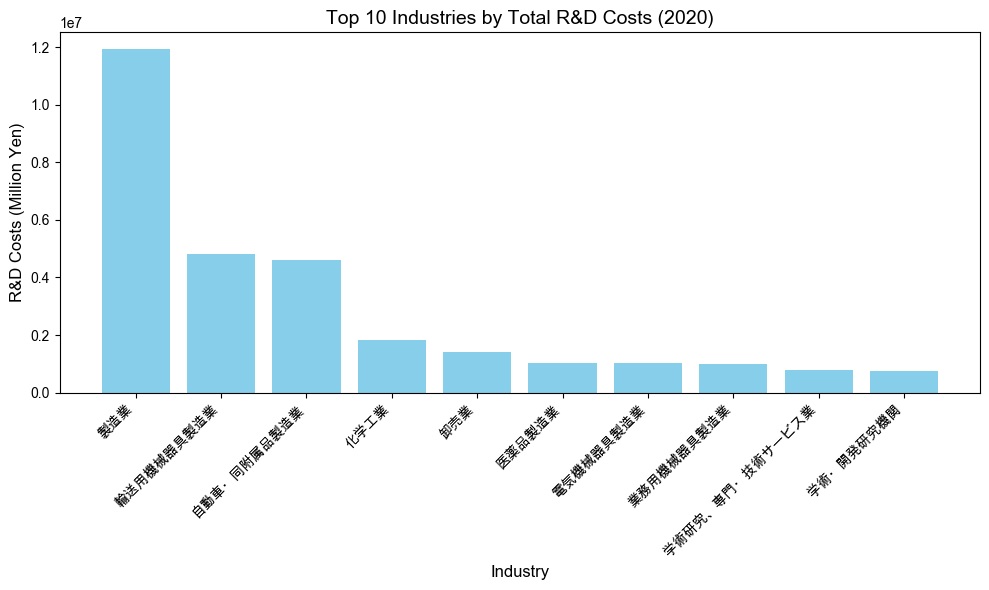

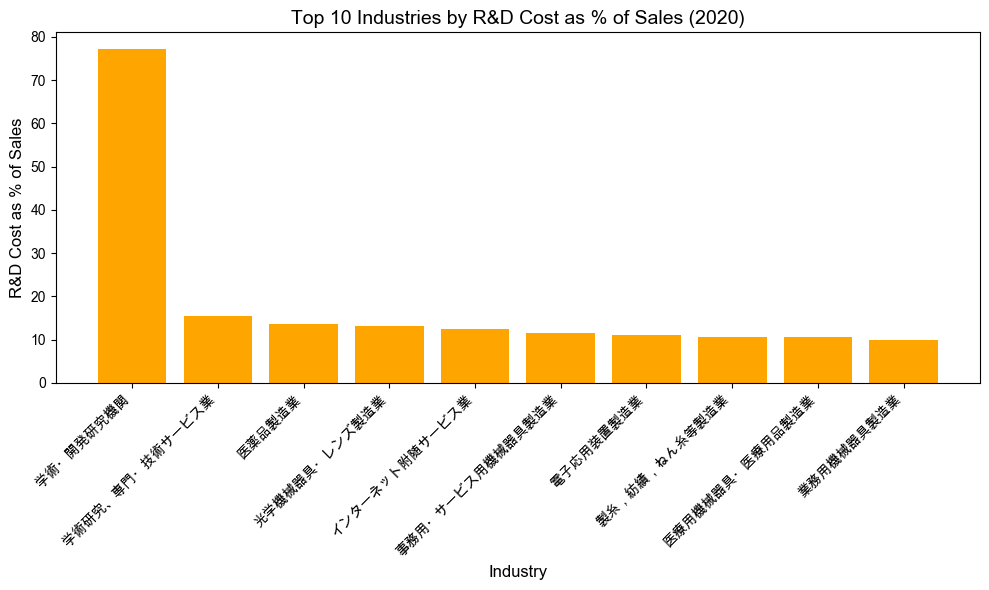

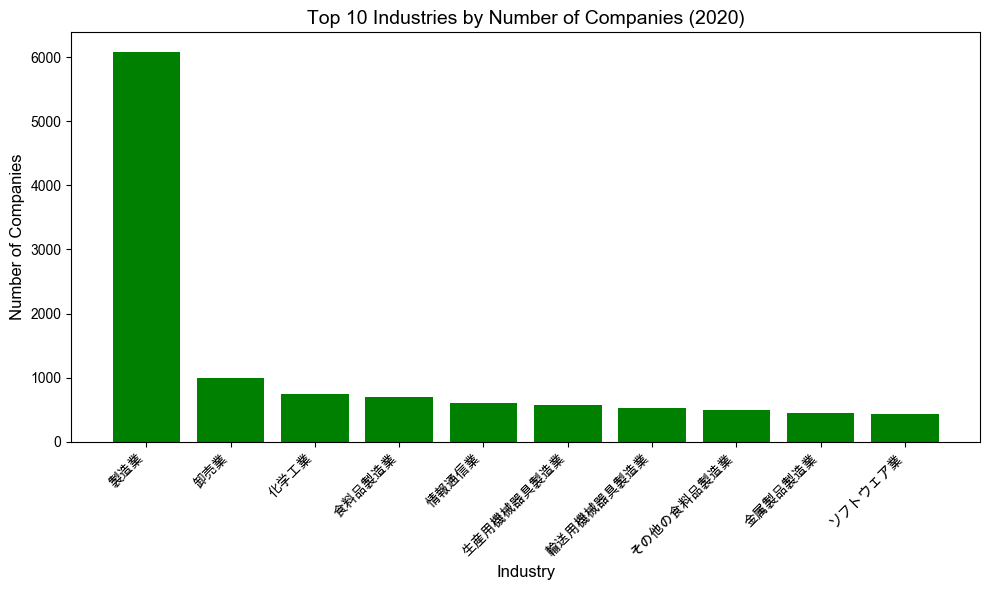

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.font_manager import FontProperties
# 自分のパソコンにインストールされている日本語フォントを指定してください
# For MacOS
fp = FontProperties(fname = '/Library/Fonts/Arial Unicode.ttf',size = 11)
plt.rc('font', family=fp.get_name())

# Example 1: Top 10 Industries by Total R&D Costs (2020)
df_2020 = df_dict[2020]
df_2020['Total R&D Costs (Million Yen)'] = pd.to_numeric(df_2020['研究開発_研究開発費_計__百万円'], errors='coerce')
top_rd_costs = df_2020.iloc[2:].nlargest(10, 'Total R&D Costs (Million Yen)')
plt.figure(figsize=(10, 6))
plt.bar(top_rd_costs['産業'], top_rd_costs['Total R&D Costs (Million Yen)'], color='skyblue')
plt.title('Top 10 Industries by Total R&D Costs (2020)', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('R&D Costs (Million Yen)', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Example 2: Top 10 Industries by R&D Cost as Percentage of Sales (2020)
df_2020['R&D Cost as % of Sales'] = pd.to_numeric(df_2020['研究開発_売上高研究開発費比率__％'], errors='coerce')
top_rd_percentage = df_2020.nlargest(10, 'R&D Cost as % of Sales')
plt.figure(figsize=(10, 6))
plt.bar(top_rd_percentage['産業'], top_rd_percentage['R&D Cost as % of Sales'], color='orange')
plt.title('Top 10 Industries by R&D Cost as % of Sales (2020)', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('R&D Cost as % of Sales', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Example 3: Top 10 Industries by Number of Companies (2020) excluding 合計 and 総合計
df_2020['Number of Companies'] = pd.to_numeric(df_2020['研究開発_企業数__社'], errors='coerce')
top_companies = df_2020.iloc[2:].nlargest(10, 'Number of Companies')  # Exclude the first two rows
plt.figure(figsize=(10, 6))
plt.bar(top_companies['産業'], top_companies['Number of Companies'], color='green')
plt.title('Top 10 Industries by Number of Companies (2020)', fontsize=14)
plt.xlabel('Industry', fontsize=12)
plt.ylabel('Number of Companies', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 2. (TODO)